# Ottawa Weather
By Hitham Jleed

created in Aug 07, 2023 for ELG 5255 Course

In [1]:
# import/Include libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
%timeit
%matplotlib inline

In [3]:
weather_Ottawa_data=pd.read_csv('data/weatherstats_30years_ottawa_daily.csv')
#https://ottawa.weatherstats.ca/download.html

dataset=weather_Ottawa_data[["date", "min_temperature_v", "max_temperature_v"]]
print(dataset.head(10))

         date  min_temperature_v  max_temperature_v
0  2023-08-07              15.14              26.71
1  2023-08-06              15.19              26.74
2  2023-08-05              15.22              26.81
3  2023-08-04              15.28              26.85
4  2023-08-03              15.32              26.87
5  2023-08-02              15.33              26.89
6  2023-08-01              15.34              26.91
7  2023-07-31              15.35              26.84
8  2023-07-30              15.41              26.86
9  2023-07-29              15.55              26.95


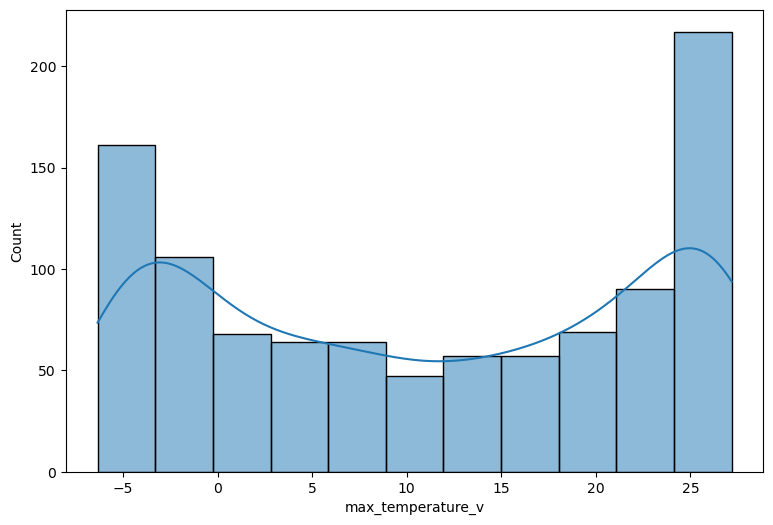

In [4]:
plt.figure(figsize=(9,6))
plt.tight_layout()
sns.histplot(data=dataset['max_temperature_v'], kde=True)
plt.show()

In [5]:
X= dataset['min_temperature_v'].values.reshape(-1,1)
y= dataset['max_temperature_v'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [6]:
model =LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [7]:
print('Intercept is :',model.intercept_)
print('Coefficient is :' ,model.coef_)

Intercept is : [10.11839538]
Coefficient is : [[1.10980764]]


In [8]:
y_pred= model.predict(X_test)

In [9]:
df=  pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

     Actual  Predicted
0      5.06   6.511521
1      6.68   7.055326
2     14.53  14.879470
3     -5.40  -6.140287
4     16.27  16.655162
..      ...        ...
195   18.41  18.330972
196   25.79  26.132920
197   -4.32  -4.031652
198   11.07  12.648757
199    0.73   0.507461

[200 rows x 2 columns]


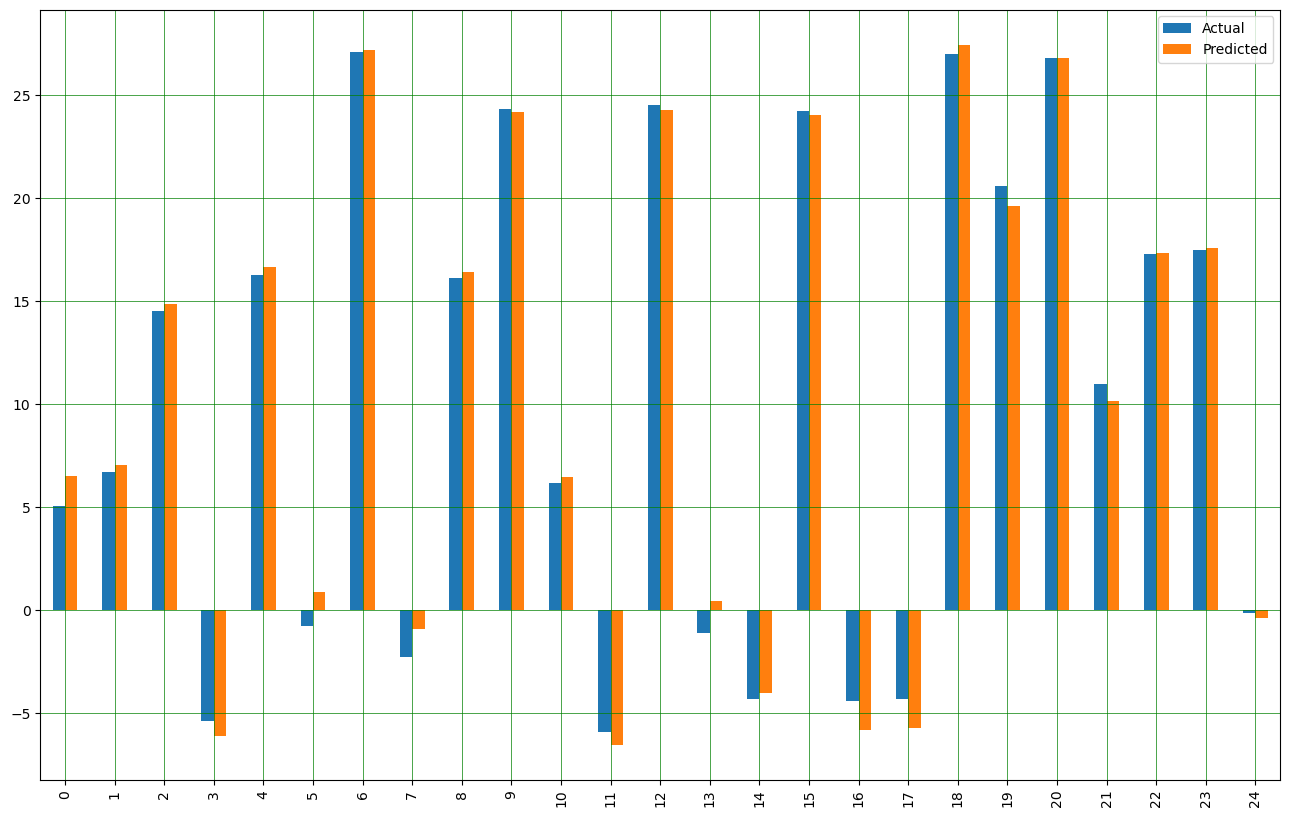

In [10]:
df1= df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()

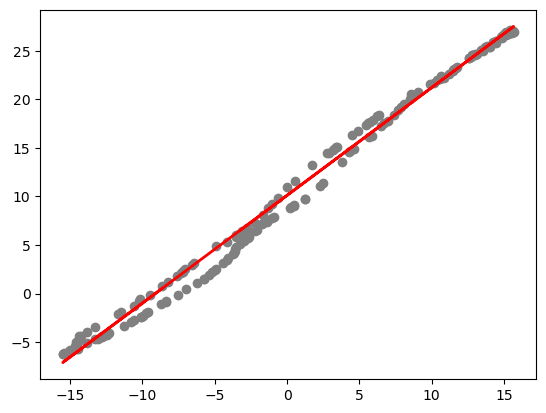

In [11]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()